In [173]:
def genmnlrvs(n1,n2,m1,m2,Cov1,Cov2): #生成資料的函數
    mvn1=multivariate_normal(mean=m1,cov=Cov1)
    mvn2=multivariate_normal(mean=m1,cov=Cov2)
    A,B=mvn1.rvs(n1),mvn2.rvs(n2)
    X=np.vstack((A,B))
    y=np.hstack((np.zeros(n1),np.ones(n2)))
    return X,y

accuracy in training for linear regression: 73.0000%
accuracy in training for Augmented linear regression: 72.5000%


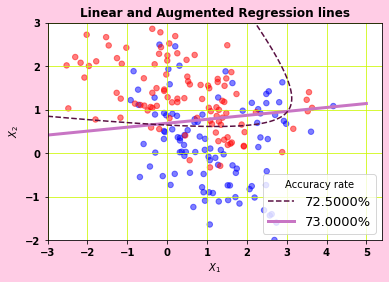

In [380]:
import numpy as np
import scipy.linalg as LA
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 1. load data
# data_dir = 'D:/NTPU/latex/python/'
D = np.loadtxt( '/Users/liang/Downloads/ml_data/la_3.txt', comments='%')
#---------------------
# area = 50 + D[:,2]
colors = ['blue' if i == 0 else 'red' for i in D[:,2]]
# colors = [[1,0,0] if i == 0 else [0,0,1] for i in D[:,2]]
fig = plt.figure(facecolor='#FFCCE5')
ax = plt.gca() # get current axis
ax.grid(True,color='#CEF80A')
ax.scatter(D[:, 0], D[:, 1], c = colors, s = 30, marker = 'o', alpha = 0.5)
plt.grid(True)
#-------------------------------------------

#一般型
x1 = D[:, 0:1] # n x 1 vector
x2 = D[:, 1:2]
X = D[:,0:2]
y = D[:,2]
n = len(y)
# Linear Regression by sklearn
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X, y) # 進行估計 （ 配適 ）
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
X2 = np.c_[np.ones(n),D[:,0:2]]
b2 = LA.inv(X2.T @ X2) @ X2.T @ y.T
# Draw a regression line

x = np.array([-3, 5])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
z=ax.plot(x, f, linewidth = 3,label='{:.4f}%'.format(100 * np.mean(y_pre1 == y)),color='#C875C4')
y_hat1 = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre1 = [1 if i > 0.5 else 0 for i in y_hat1] # 群組判讀
# plt.plot(x, f, lw=3,label='{:.4f}%'.format(100 * np.mean(y_pre1 == y)),color='#C875C4')
print("accuracy in training for linear regression: {:.4f}%".format(100 * np.mean(y_pre1 == y)))

#增廣型---------------------------------------------------------
x1 = D[:, 0:1] # n x 1 vector
x2 = D[:, 1:2]
X1 = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = D[:,2]
n = len(y)
Xgd = np.hstack((np.ones((n, 1)), \
x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
# Linear Regression by sklearn
Mda = LinearRegression()# 建立新的 linear regression model
Mda.fit(X1, y) # 進行估計 （ 配適 ）
intrcp1 = Mda.intercept_ # 估計結果 ：beta0
coeffs1 = Mda.coef_ # # 估計結果 ：beta1, beta2, ...
b = LA.pinv(Xgd) @ y # pseudo inverse 
# Calculate testing error
y_hat = Mda.predict(X1) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
# plt.title('Accuracy in training is {:.2f}'.format(100 * np.mean(y_pre == y)))
plt.xlabel('$X_1$',weight='bold'), plt.ylabel('$X_2$',weight='heavy')
print("accuracy in training for Augmented linear regression: {:.4f}%".format(100 * np.mean(y_pre == y)))

#------Draw count plot---------------------------
f = (
lambda x: intrcp1
+ coeffs1[0] * x[0]
+ coeffs1[1] * x[1]
+ coeffs1[2] * x[0] * x[1]
+ coeffs1[3] * x[0] ** 2
+ coeffs1[4] * x[1] ** 2)
xx = np.linspace(-3, 4, 100)
yy = np.linspace(-2, 3, 100)
X_, Y_ = np.meshgrid(xx, yy)
Z = f([X_, Y_])
contours = plt.contour(X_, Y_, Z, levels = [0.5], colors='#580F41', linestyles='--')
artists,_ = contours.legend_elements() 
contours.collections[0].set_label(\
        '{:.4f}%'.format(100*np.mean(y_pre == y)))  
plt.xticks(fontweight='semibold') ,plt.yticks(fontweight='semibold') 
plt.title('Linear and Augmented Regression lines',fontweight='semibold')
plt.legend([artists[0],z[0],],\
           ['{:.4f}%'.format(100*np.mean(y_pre == y)) , '{:.4f}%'.format(100 * np.mean(y_pre1 == y))],\
           loc='lower right',
          title='Accuracy rate',fontsize=13)
plt.savefig('hw4example.pdf', format='pdf')
plt.show()

General data0
平均數的差異

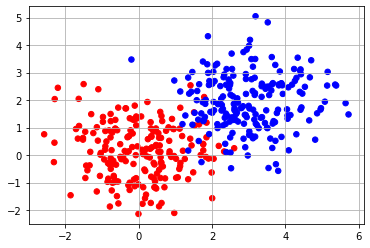

In [279]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# X,y=genmnlrvs(200,200,np.array([0, 0]), np.array([4, 1]),Cov1 = np.array([[1, 0], [0, 1]])\
#  ,Cov2 = np.array([[1, 0.2], [0.2, 1]])) 
n1, n2 = 200, 200
m1, m2 = np.array([0, 0]), np.array([3, 2])
Cov1 = np.array([[1, 0], [0, 1]])
Cov2 = np.array([[1, 0], [0, 1]])
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
A, B = mvn1.rvs(n1), mvn2.rvs(n2)
X = np.vstack((A, B))

y = np.hstack((np.zeros(n1), np.ones(n2)))

np.savetxt('hw4_data0.txt', np.c_[X, y],fmt = '%.4f %.4f %d', header = 'X1 X2 y')
colors = ['red' if i == 0 else 'blue' for i in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=30, marker='o')
plt.grid(True)
plt.show()

accuracy in training for linear regression: 95.7500%
accuracy in training for Augmented linear regression: 96.2500%


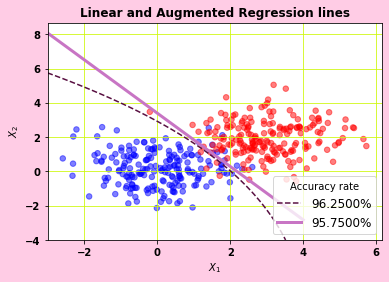

In [401]:
import numpy as np
import scipy.linalg as LA
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 1. load data
data_dir = '/Users/liang/Documents/Github/'
D = np.loadtxt(data_dir+'hw4_data0.txt', comments='#')#讓第一列不要讀進去
train_data, test_data = train_test_split(D, random_state=777, train_size=0.8)
#---------------------
# area = 50 + D[:,2]
colors = ['blue' if i == 0 else 'red' for i in D[:,2]]
# colors = [[1,0,0] if i == 0 else [0,0,1] for i in D[:,2]]
fig = plt.figure(facecolor='#FFCCE5')
ax = plt.gca() # get current axis
ax.grid(True,color='#CEF80A')
ax.scatter(D[:, 0], D[:, 1], c = colors, s = 30, marker = 'o', alpha = 0.5)
plt.grid(True)
#-------------------------------------------
# Augmented regression line by a contour line at 0.5
#一般型
x1 = D[:, 0:1] # n x 1 vector
x2 = D[:, 1:2]
X = D[:,0:2]
y = D[:,2]
n = len(y)
# Linear Regression by sklearn
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X, y) # 進行估計 （ 配適 ）
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
y2 = D[:, 2]
X2 = np.c_[np.ones(n),D[:,0:2]]
b2 = LA.inv(X2.T @ X2) @ X2.T @ y2.T
# Draw a regression line
x = np.array([-3, 4])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
y_hat1 = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre1 = [1 if i > 0.5 else 0 for i in y_hat1] # 群組判讀
z=ax.plot(x, f, linewidth = 3,label='{:.4f}%'.format(100 * np.mean(y_pre1 == y)),color='#C875C4')
# plt.plot(x, f, lw=3, \
        # label = '{:.4f}%'.format(100* np.mean(y_pre1 == y)))

print("accuracy in training for linear regression: {:.4f}%".format(100 * np.mean(y_pre1 == y)))

#增廣型-----
x1 = D[:, 0:1] # n x 1 vector
x2 = D[:, 1:2]
X1 = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = D[:,2]
n = len(y)
Xgd = np.hstack((np.ones((n, 1)), \
x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
# Linear Regression by sklearn
Mda = LinearRegression()# 建立新的 linear regression model
Mda.fit(X1, y) # 進行估計 （ 配適 ）
intrcp1 = Mda.intercept_ # 估計結果 ：beta0
coeffs1 = Mda.coef_ # # 估計結果 ：beta1, beta2, ...
b = LA.pinv(Xgd) @ y # pseudo inverse 
# Calculate testing error
y_hat = Mda.predict(X1) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
# plt.title('Accuracy in training is {:.2f}'.format(100 * np.mean(y_pre == y)))
plt.xlabel('$X_1$'), plt.ylabel('$X_2$')
print("accuracy in training for Augmented linear regression: {:.4f}%".format(100 * np.mean(y_pre == y)))

#------Draw count plot---------------------------
f = (
lambda x: intrcp1
+ coeffs1[0] * x[0]
+ coeffs1[1] * x[1]
+ coeffs1[2] * x[0] * x[1]
+ coeffs1[3] * x[0] ** 2
+ coeffs1[4] * x[1] ** 2)
xx = np.linspace(-3.0, 5, 100)
yy = np.linspace(-4, 8, 100)
X_, Y_ = np.meshgrid(xx, yy)
Z = f([X_, Y_])
# contours = plt.contour(X, Y, Z, levels = [0.5], colors='g', linestyles='--')
# plt.ylim(-5,5)
plt.title('Linear and Augmented Regression lines',fontweight='semibold')
# plt.show()
#  繪 製 augmented regression line 
contours = plt.contour(
    X_, Y_, Z, levels = [0.5], colors='#580F41', linestyles='--')
artists,_ = contours.legend_elements() 
contours.collections[0].set_label(\
        '{:.4f}%'.format(100*np.mean(y_pre == y)))
plt.legend([artists[0],z[0],],\
           ['{:.4f}%'.format(100*np.mean(y_pre == y)) , '{:.4f}%'.format(100 * np.mean(y_pre1 == y))],\
           loc='lower right',
          title='Accuracy rate',fontsize=12)
plt.xticks(fontweight='semibold') ,plt.yticks(fontweight='semibold') 
plt.savefig('hw4data0.pdf', format='pdf')
plt.show() 

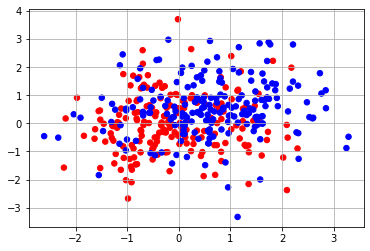

In [293]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# X,y=genmnlrvs(200,200,np.array([0, 0]), np.array([4, 1]),Cov1 = np.array([[1, 0], [0, 1]])\
#  ,Cov2 = np.array([[1, 0.2], [0.2, 1]])) 
n1, n2 = 200, 200
m1, m2 = np.array([0, 0]), np.array([0.5, 0.5])
Cov1 = np.array([[1, 0], [0, 1]])
Cov2 = np.array([[1, 0], [0, 1]])
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
A, B = mvn1.rvs(n1), mvn2.rvs(n2)
X = np.vstack((A, B))

y = np.hstack((np.zeros(n1), np.ones(n2)))

np.savetxt('hw4_data01.txt', np.c_[X, y],fmt = '%.4f %.4f %d', header = 'X1 X2 y')
colors = ['red' if i == 0 else 'blue' for i in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=30, marker='o')
plt.grid(True)
plt.show()

accuracy in training for linear regression: 66.0000%
accuracy in training for Augmented linear regression: 66.7500%


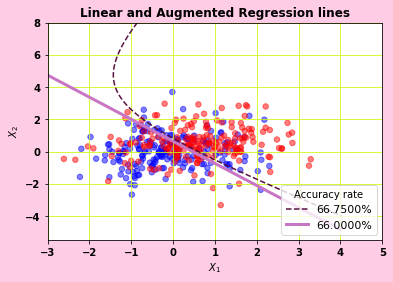

In [402]:
import numpy as np
import scipy.linalg as LA
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 1. load data
data_dir = '/Users/liang/Documents/Github/'
D = np.loadtxt(data_dir+'hw4_data01.txt', comments='#')#讓第一列不要讀進去
# train_data, test_data = train_test_split(D, random_state=777, train_size=0.8)
#---------------------
# area = 50 + D[:,2]
colors = ['blue' if i == 0 else 'red' for i in D[:,2]]
# colors = [[1,0,0] if i == 0 else [0,0,1] for i in D[:,2]]
fig = plt.figure(facecolor='#FFCCE5')
ax = plt.gca() # get current axis
ax.grid(True,color='#CEF80A')
ax.scatter(D[:, 0], D[:, 1], c = colors, s = 30, marker = 'o', alpha = 0.5)
plt.grid(True)
#-------------------------------------------
# Augmented regression line by a contour line at 0.5
#一般型
x1 = D[:, 0:1] # n x 1 vector
x2 = D[:, 1:2]
X = D[:,0:2]
y = D[:,2]
n = len(y)
# Linear Regression by sklearn
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X, y) # 進行估計 （ 配適 ）
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
y2 = D[:, 2]
X2 = np.c_[np.ones(n),D[:,0:2]]
b2 = LA.inv(X2.T @ X2) @ X2.T @ y2.T
# Draw a regression line
x = np.array([-3, 4])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
y_hat1 = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre1 = [1 if i > 0.5 else 0 for i in y_hat1] # 群組判讀
z=ax.plot(x, f, linewidth = 3,label='{:.4f}%'.format(100 * np.mean(y_pre1 == y)),color='#C875C4')
# plt.plot(x, f, lw=3, \
        # label = '{:.4f}%'.format(100* np.mean(y_pre1 == y)))

print("accuracy in training for linear regression: {:.4f}%".format(100 * np.mean(y_pre1 == y)))

#增廣型-----
x1 = D[:, 0:1] # n x 1 vector
x2 = D[:, 1:2]
X1 = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = D[:,2]
n = len(y)
Xgd = np.hstack((np.ones((n, 1)), \
x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
# Linear Regression by sklearn
Mda = LinearRegression()# 建立新的 linear regression model
Mda.fit(X1, y) # 進行估計 （ 配適 ）
intrcp1 = Mda.intercept_ # 估計結果 ：beta0
coeffs1 = Mda.coef_ # # 估計結果 ：beta1, beta2, ...
b = LA.pinv(Xgd) @ y # pseudo inverse 
# Calculate testing error
y_hat = Mda.predict(X1) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
# plt.title('Accuracy in training is {:.2f}'.format(100 * np.mean(y_pre == y)))
plt.xlabel('$X_1$'), plt.ylabel('$X_2$')
print("accuracy in training for Augmented linear regression: {:.4f}%".format(100 * np.mean(y_pre == y)))

#------Draw count plot---------------------------
f = (
lambda x: intrcp1
+ coeffs1[0] * x[0]
+ coeffs1[1] * x[1]
+ coeffs1[2] * x[0] * x[1]
+ coeffs1[3] * x[0] ** 2
+ coeffs1[4] * x[1] ** 2)
xx = np.linspace(-3.0, 5, 100)
yy = np.linspace(-4, 8, 100)
X_, Y_ = np.meshgrid(xx, yy)
Z = f([X_, Y_])
# contours = plt.contour(X, Y, Z, levels = [0.5], colors='g', linestyles='--')
# plt.ylim(-5,5)
plt.title('Linear and Augmented Regression lines',fontweight='semibold')
# plt.show()
#  繪 製 augmented regression line 
contours = plt.contour(
    X_, Y_, Z, levels = [0.5], colors='#580F41', linestyles='--')
artists,_ = contours.legend_elements()    
contours.collections[0].set_label(\
        '{:.4f}%'.format(100*np.mean(y_pre == y)))         
plt.legend([artists[0],z[0],],\
           ['{:.4f}%'.format(100*np.mean(y_pre == y)) , '{:.4f}%'.format(100 * np.mean(y_pre1 == y))],\
           loc='lower right',
          title='Accuracy rate',fontsize=11)
plt.xticks(fontweight='semibold') ,plt.yticks(fontweight='semibold') 

plt.savefig('hw4data01.pdf', format='pdf')
plt.show() 

general data1樣本數的不同

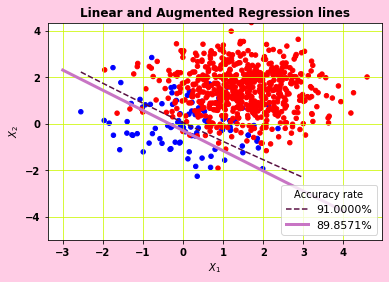

In [403]:
import sklearn.linear_model
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def generate_data(n1,n2,m1,m2,Cov1,Cov2):

    mvn1 = multivariate_normal(mean = m1, cov = Cov1 )
    mvn2 = multivariate_normal(mean = m2, cov = Cov2 )
    A, B = mvn1.rvs(n1), mvn2.rvs(n2)
    X = np.vstack((A, B))
    y = np.hstack((np.zeros(n1), np.ones(n2)))
    return X,y

#參數設定
n1 , n2 = 100 , 600
m1 , m2 = [0,0] , [1.5,1.5]
Cov1=[[1,0],[0,1]]
Cov2=[[1,0],[0,1]]

X,y=generate_data(n1,n2,m1,m2,Cov1,Cov2)
#一般線性
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X[:,0:2], y) # 進行估計 （ 配適 ）
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
x = np.array([-3, 4])
f11 = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
y_hat1 = Mdl.predict(X[:,0:2]) # 預 測 或 計 算 擬 合 值
y_pre1 = [1 if i > 0.5 else 0 for i in y_hat1] # 群組判讀
fig = plt.figure(facecolor='#FFCCE5')
ax = plt.gca() # get current axis
ax.grid(True,color='#CEF80A')
z=plt.plot(x, f11, lw=3,label='{:.4f}%'.format(100 * np.mean(y_pre1 == y)),color='#C875C4')

#---------------------------------------------------------------------------

X_input = np.hstack( (X[:,0:1], X[:,1:2], \
    X[:,0:1] * X[:,1:2],\
    X[:,0:1] ** 2, X[:,1:2] ** 2))

clf=sklearn.linear_model.LinearRegression()
clf.fit(X_input,y)
y_hat = clf.predict(X_input) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
# plt.title('Accuracy in training is {:.2f}'.format(100 * np.mean(y_pre == y)))
plt.xlabel('$X_1$'), plt.ylabel('$X_2$')
x1=X[:,0:1]
x2=X[:,1:2]
coeffe=clf.coef_
intecep=clf.intercept_
f=(lambda x:
 intecep
+ coeffe[0] * x[0]
+ coeffe[1] * x[1]
+ coeffe[2] * x[0] * x[1]
+coeffe[3] * x[0] ** 2
+coeffe[4] * x[1] ** 2)

xx=np.linspace(x1.min(),3,100)
yy=np.linspace(-5,x2.max(),100)
X1,Y1=np.meshgrid(xx,yy)
Z=f([X1,Y1])
contours=plt.contour(X1,Y1,Z, levels = [0.5],colors='#580F41',linestyles='--')
contours.collections[0].set_label(\
        '{:.4f}%'.format(100*np.mean(y_pre == y)))
artists,_ = contours.legend_elements()          
plt.legend([artists[0],z[0],],\
           ['{:.4f}%'.format(100*np.mean(y_pre == y)) , '{:.4f}%'.format(100 * np.mean(y_pre1 == y))],\
           loc='lower right',
          title='Accuracy rate',fontsize=11)
plt.title('Linear and Augmented Regression lines',fontweight='semibold')
colors = ['blue' if i == 0 else 'red' for i in y]
plt.xticks(fontweight='semibold') ,plt.yticks(fontweight='semibold') 
plt.scatter(X[:,0], X[:,1],c=colors, s=20, marker="o")
plt.savefig('hw4data1.pdf',format='pdf')
plt.show()

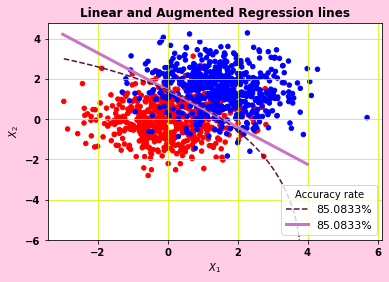

In [400]:
import sklearn.linear_model
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def generate_data(n1,n2,m1,m2,Cov1,Cov2):

    mvn1 = multivariate_normal(mean = m1, cov = Cov1 , seed=56)
    mvn2 = multivariate_normal(mean = m2, cov = Cov2 , seed=46)
    A, B = mvn1.rvs(n1), mvn2.rvs(n2)
    X = np.vstack((A, B))
    y = np.hstack((np.zeros(n1), np.ones(n2)))
    return X,y

#參數設定
n1 , n2 = 600 , 600
m1 , m2 = [0,0] , [1.5,1.5]
Cov1=[[1,0],[0,1]]
Cov2=[[1,0],[0,1]]


#一般線性
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X[:,0:2], y) # 進行估計 （ 配適 ）
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
x = np.array([-3, 4])
f11 = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
y_hat1 = Mdl.predict(X[:,0:2]) # 預 測 或 計 算 擬 合 值
y_pre1 = [1 if i > 0.5 else 0 for i in y_hat1] # 群組判讀
fig = plt.figure(facecolor='#FFCCE5')
ax = plt.gca() # get current axis
ax.grid(True,color='#CEF80A')
colors = ['blue' if i == 0 else 'red' for i in y]
ax.scatter(X[:,0], X[:,1],c=colors, s=20, marker="o")
z=plt.plot(x, f11, lw=3,label='{:.4f}%'.format(100 * np.mean(y_pre1 == y)),color='#C875C4')

#---------------------------------------------------------------------------
X,y=generate_data(n1,n2,m1,m2,Cov1,Cov2)
X_input = np.hstack( (X[:,0:1], X[:,1:2], \
    X[:,0:1] * X[:,1:2],\
    X[:,0:1] ** 2, X[:,1:2] ** 2))

clf=sklearn.linear_model.LinearRegression()
clf.fit(X_input,y)
y_hat = clf.predict(X_input) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
# plt.title('Accuracy in training is {:.2f}'.format(100 * np.mean(y_pre == y)))
plt.xlabel('$X_1$'), plt.ylabel('$X_2$')
x1=X[:,0:1]
x2=X[:,1:2]
coeffe=clf.coef_
intecep=clf.intercept_
f=(lambda x:
 intecep
+ coeffe[0] * x[0]
+ coeffe[1] * x[1]
+ coeffe[2] * x[0] * x[1]
+coeffe[3] * x[0] ** 2
+coeffe[4] * x[1] ** 2)

xx=np.linspace(x1.min(),4,100)
yy=np.linspace(-6,4,100)
X1,Y1=np.meshgrid(xx,yy)
Z=f([X1,Y1])
contours=plt.contour(X1,Y1,Z, levels = [0.5], colors='#580F41', linestyles='--')
contours.collections[0].set_label(\
        '{:.4f}%'.format(100*np.mean(y_pre == y)))
artists,_ = contours.legend_elements()          
plt.legend([artists[0],z[0],],\
           ['{:.4f}%'.format(100*np.mean(y_pre == y)) , '{:.4f}%'.format(100 * np.mean(y_pre1 == y))],\
           loc='lower right',
          title='Accuracy rate',fontsize=11)
plt.title('Linear and Augmented Regression lines',fontweight='semibold')
plt.xticks(fontweight='semibold') ,plt.yticks(fontweight='semibold') 
plt.savefig('hw4data12.pdf',format='pdf')
plt.show()

共變異數矩陣不同
general data2

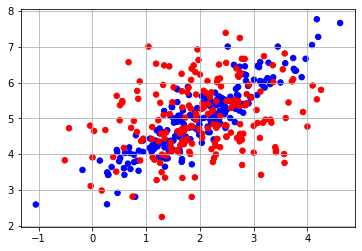

In [147]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
# X,y=genmnlrvs(200,200,np.array([2, 5]), np.array([2, 5]),Cov1 = np.array([[1, 0.9], [0.9, 1]])
#  ,Cov2 = np.array([[1, 0.2], [0.2, 1]])) 
n1, n2 = 200, 200
m1, m2 = np.array([2, 5]), np.array([2, 5])
Cov1 = np.array([[1, 0.9], [0.9, 1]])
Cov2 = np.array([[1, 0.2], [0.2, 1]])
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
A, B = mvn1.rvs(n1), mvn2.rvs(n2)
X = np.vstack((A, B))
y = np.hstack((np.zeros(n1), np.ones(n2)))
np.savetxt('hw4_data3.txt', np.c_[X, y],fmt = '%.4f %.4f %d', header = 'X1 X2 y')
colors = ['blue' if i == 0 else 'red' for i in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=30, marker='o')
plt.grid(True)
plt.show()

accuracy in training for linear regression: 48.7500%
accuracy in training for Augmented linear regression: 68.5000%


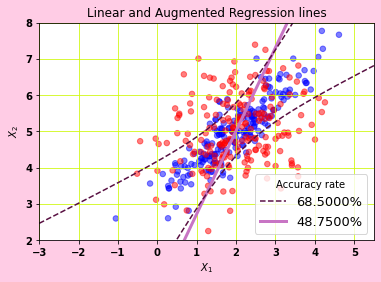

In [369]:
import numpy as np
import scipy.linalg as LA
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 1. load data
data_dir = '/Users/liang/Documents/Github/'
D = np.loadtxt(data_dir+'hw4_data3.txt', comments='#')#讓第一列不要讀進去
#---------------------
# area = 50 + D[:,2]
colors = ['blue' if i == 0 else 'red' for i in D[:,2]]
# colors = [[1,0,0] if i == 0 else [0,0,1] for i in D[:,2]]
fig = plt.figure(facecolor='#FFCCE5')
ax = plt.gca() # get current axis
ax.grid(True,color='#CEF80A')
ax.scatter(D[:, 0], D[:, 1], c = colors, s = 30, marker = 'o', alpha = 0.5)
plt.grid(True)  
#-------------------------------------------
# Augmented regression line by a contour line at 0.5
#一般型
x1 = D[:, 0:1] # n x 1 vector
x2 = D[:, 1:2]
X = D[:,0:2]
y = D[:,2]
n = len(y)
# Linear Regression by sklearn
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X, y) # 進行估計 （ 配適 ）
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
y2 = D[:, 2]
X2 = np.c_[np.ones(n),D[:,0:2]]
b2 = LA.inv(X2.T @ X2) @ X2.T @ y2.T
# Draw a regression line
# fig = plt.figure(facecolor='#C5C9C7')
x = np.array([-3, 5])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
y_hat1 = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre1 = [1 if i > 0.5 else 0 for i in y_hat1] # 群組判讀
z=ax.plot(x, f, linewidth = 3,label='{:.4f}%'.format(100 * np.mean(y_pre1 == y)),color='#C875C4')
print("accuracy in training for linear regression: {:.4f}%".format(100 * np.mean(y_pre1 == y)))

#增廣型-----
x1 = D[:, 0:1] # n x 1 vector
x2 = D[:, 1:2]
X1 = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = D[:,2]
n = len(y)
Xgd = np.hstack((np.ones((n, 1)), \
x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
# Linear Regression by sklearn
Mda = LinearRegression()# 建立新的 linear regression model
Mda.fit(X1, y) # 進行估計 （ 配適 ）
intrcp1 = Mda.intercept_ # 估計結果 ：beta0
coeffs1 = Mda.coef_ # # 估計結果 ：beta1, beta2, ...
b = LA.pinv(Xgd) @ y # pseudo inverse 
# Calculate testing error
y_hat = Mda.predict(X1) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
# plt.title('Accuracy in training is {:.2f}'.format(100 * np.mean(y_pre == y)))
plt.xlabel('$X_1$'), plt.ylabel('$X_2$')
print("accuracy in training for Augmented linear regression: {:.4f}%".format(100 * np.mean(y_pre == y)))

#------Draw count plot---------------------------
f = (
lambda x: intrcp1
+ coeffs1[0] * x[0]
+ coeffs1[1] * x[1]
+ coeffs1[2] * x[0] * x[1]
+ coeffs1[3] * x[0] ** 2
+ coeffs1[4] * x[1] ** 2)
xx = np.linspace(-3, 5.5, 100)
yy = np.linspace(2, 8, 100)
X_, Y_ = np.meshgrid(xx, yy)
Z = f([X_, Y_])
contours = plt.contour(X_, Y_, Z, levels = [0.5], colors='#580F41', linestyles='--')
artists,_ = contours.legend_elements()
contours.collections[0].set_label(\
        '{:.4f}%'.format(100*np.mean(y_pre == y)))
# plt.legend(title = 'Misclassification rate')
plt.title('Linear and Augmented Regression lines')
plt.ylim(2,8)
plt.legend([artists[0],z[0],],\
           ['{:.4f}%'.format(100*np.mean(y_pre == y)) , '{:.4f}%'.format(100 * np.mean(y_pre1 == y))],\
           loc='lower right',
          title='Accuracy rate',fontsize=13)
plt.xticks(fontweight='semibold') ,plt.yticks(fontweight='semibold') 
plt.savefig('hw4data3.pdf', format='pdf')
plt.show()

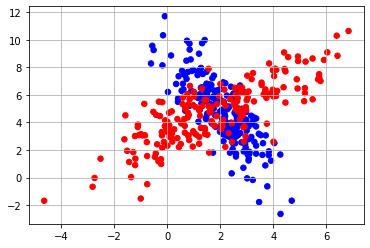

In [350]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
# X,y=genmnlrvs(200,200,np.array([2, 5]), np.array([2, 5]),Cov1 = np.array([[1, 0.9], [0.9, 1]])
#  ,Cov2 = np.array([[1, 0.2], [0.2, 1]])) 
n1, n2 = 200, 200
m1, m2 = np.array([2, 5]), np.array([2, 5])
Cov1 = np.array([[1, -2], [-2, 6]])
Cov2 = np.array([[5, 4], [4, 5]])
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
A, B = mvn1.rvs(n1), mvn2.rvs(n2)
X = np.vstack((A, B))
y = np.hstack((np.zeros(n1), np.ones(n2)))
np.savetxt('hw4_data31.txt', np.c_[X, y],fmt = '%.4f %.4f %d', header = 'X1 X2 y')
colors = ['blue' if i == 0 else 'red' for i in y]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=30, marker='o')
plt.grid(True)
plt.show()

accuracy in training for linear regression: 57.0000%
accuracy in training for Augmented linear regression: 81.7500%


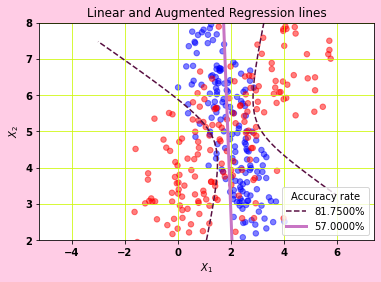

In [372]:
import numpy as np
import scipy.linalg as LA
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 1. load data
data_dir = '/Users/liang/Documents/Github/'
D = np.loadtxt(data_dir+'hw4_data31.txt', comments='#')#讓第一列不要讀進去
#---------------------
# area = 50 + D[:,2]
colors = ['blue' if i == 0 else 'red' for i in D[:,2]]
# colors = [[1,0,0] if i == 0 else [0,0,1] for i in D[:,2]]
fig = plt.figure(facecolor='#FFCCE5')
ax = plt.gca() # get current axis
ax.grid(True,color='#CEF80A')
ax.scatter(D[:, 0], D[:, 1], c = colors, s = 30, marker = 'o', alpha = 0.5)
plt.grid(True)  
#-------------------------------------------
# Augmented regression line by a contour line at 0.5
#一般型
x1 = D[:, 0:1] # n x 1 vector
x2 = D[:, 1:2]
X = D[:,0:2]
y = D[:,2]
n = len(y)
# Linear Regression by sklearn
Mdl = LinearRegression()# 建立新的 linear regression model
Mdl.fit(X, y) # 進行估計 （ 配適 ）
intrcp = Mdl.intercept_ # 估計結果 ：beta0
coeffs = Mdl.coef_ # # 估計結果 ：beta1, beta2, ...
y2 = D[:, 2]
X2 = np.c_[np.ones(n),D[:,0:2]]
b2 = LA.inv(X2.T @ X2) @ X2.T @ y2.T
# Draw a regression line
# fig = plt.figure(facecolor='#C5C9C7')
x = np.array([-3, 5])
f = -(intrcp - 0.5 + coeffs[0] * x) / coeffs[1]
y_hat1 = Mdl.predict(X) # 預 測 或 計 算 擬 合 值
y_pre1 = [1 if i > 0.5 else 0 for i in y_hat1] # 群組判讀
z=ax.plot(x, f, linewidth = 3,label='{:.4f}%'.format(100 * np.mean(y_pre1 == y)),color='#C875C4')
print("accuracy in training for linear regression: {:.4f}%".format(100 * np.mean(y_pre1 == y)))

#增廣型-----
x1 = D[:, 0:1] # n x 1 vector
x2 = D[:, 1:2]
X1 = np.hstack((x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
y = D[:,2]
n = len(y)
Xgd = np.hstack((np.ones((n, 1)), \
x1, x2, x1 * x2, x1 ** 2, x2 ** 2))
# Linear Regression by sklearn
Mda = LinearRegression()# 建立新的 linear regression model
Mda.fit(X1, y) # 進行估計 （ 配適 ）
intrcp1 = Mda.intercept_ # 估計結果 ：beta0
coeffs1 = Mda.coef_ # # 估計結果 ：beta1, beta2, ...
b = LA.pinv(Xgd) @ y # pseudo inverse 
# Calculate testing error
y_hat = Mda.predict(X1) # 預 測 或 計 算 擬 合 值
y_pre = [1 if i > 0.5 else 0 for i in y_hat] # 群組判讀
# plt.title('Accuracy in training is {:.2f}'.format(100 * np.mean(y_pre == y)))
plt.xlabel('$X_1$'), plt.ylabel('$X_2$')
print("accuracy in training for Augmented linear regression: {:.4f}%".format(100 * np.mean(y_pre == y)))

#------Draw count plot---------------------------
f = (
lambda x: intrcp1
+ coeffs1[0] * x[0]
+ coeffs1[1] * x[1]
+ coeffs1[2] * x[0] * x[1]
+ coeffs1[3] * x[0] ** 2
+ coeffs1[4] * x[1] ** 2)
xx = np.linspace(-3, 6, 100)
yy = np.linspace(2, 8, 100)
X_, Y_ = np.meshgrid(xx, yy)
Z = f([X_, Y_])
contours = plt.contour(X_, Y_, Z, levels = [0.5], colors='#580F41', linestyles='--')
artists,_ = contours.legend_elements()
contours.collections[0].set_label(\
        '{:.4f}%'.format(100*np.mean(y_pre == y)))
# plt.legend(title = 'Misclassification rate')
plt.title('Linear and Augmented Regression lines')
plt.ylim(2,8)
plt.legend([artists[0],z[0],],\
           ['{:.4f}%'.format(100*np.mean(y_pre == y)) , '{:.4f}%'.format(100 * np.mean(y_pre1 == y))],\
           loc='lower right',
          title='Accuracy rate',fontsize=10)
plt.xticks(fontweight='semibold') ,plt.yticks(fontweight='semibold') 
plt.savefig('hw4data31.pdf', format='pdf')
plt.show()

geneal data3羅吉斯

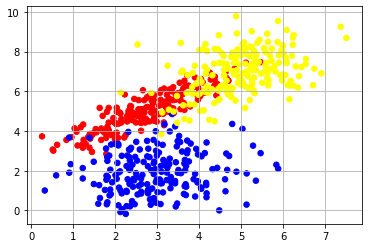

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
n1, n2, n3 = 200, 200, 200
m1, m2, m3 = np.array([2.7, 5]), np.array([3, 2]),np.array([5,7])
Cov1 = np.array([[1, 0.9], [0.9, 1]])
Cov2 = np.array([[1, 0.2], [0.2, 1]])
Cov3 = np.array([[1, 0.4], [0.4, 1]])
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
mvn3 = multivariate_normal(mean = m3, cov = Cov3)
A, B,C = mvn1.rvs(n1), mvn2.rvs(n2),mvn3.rvs(n3)
X = np.vstack((A, B, C))
two=np.ones(n3)
for i in np.arange(200):
    two[i]=2
y = np.hstack((np.zeros(n1), np.ones(n2), two))
np.savetxt('hw4_data4.txt', np.c_[X, y],fmt = '%.4f %.4f %d', header = 'X1 X2 y')
colors = ['red' if i == 0 else 'blue' if i==1 else 'yellow' for i in y]     
plt.scatter(X[:, 0], X[:, 1], c=colors, s=30, marker='o')
plt.grid(True)
plt.show()

logistic model

accuracy in training for agumented regression:     90.1667%
[  0.6090045    9.42882548 -10.03782998]
[[-1.42456704  1.1568742 ]
 [ 0.71190221 -2.69347868]
 [ 0.71266483  1.53660449]]


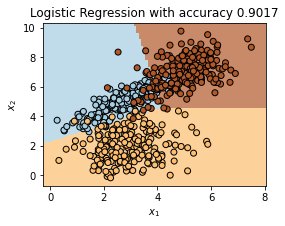

In [340]:
import numpy as np
import scipy.linalg as LA
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay

data_dir = '/Users/liang/Documents/Github/'
D = np.loadtxt(data_dir+'hw4_data4.txt', comments='#')#讓第一列不要讀進去
colors = ['red' if i == 0 else 'blue' if i==1 else 'yellow' for i in y]     
# plt.scatter(X[:, 0], X[:, 1], c=colors, s=30, marker='o')
# plt.grid(True)
X=D[:,0:2]
y=D[:,2]
logReg= LogisticRegression().fit(X,y)
y_hat=logReg.predict(X)
# print("accuracy in training for agumented regression: \
#     {:.4f}%".format(100*np.mean(y_hat==y)))
print("accuracy in training for agumented regression: \
    {:.4f}%".format(100*logReg.score(X,y)))
y_prob=logReg.predict_proba(X)
print(logReg.intercept_)
print(logReg.coef_)

_,ax=plt.subplots(figsize=(4,3))
DecisionBoundaryDisplay.from_estimator(
    logReg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method='predict',
    plot_method='pcolormesh',
    shading='auto',
    xlabel='$x_1$',
    ylabel='$x_2$',
    eps=0.5,
    alpha=0.7
)
plt.scatter(X[:,0],X[:,1],c=y,edgecolor='k',cmap=plt.cm.Paired)
plt.title('Logistic Regression with accuracy {:.4f}'.format(logReg.score(X,y)))
plt.savefig('hw4logistic.pdf',format='pdf')
